# Let's create the model we'll be using for object detection in luggage X-ray images.
This was made using Google Colab, since it provides a virtual GPU to use for training.


In [ ]:
# tells you if you're running code on the GPU.
# must print "True"
import torch
print(torch.cuda.is_available())

True


In [ ]:
# install detecto.
# this library uses Faster R-CNN architecture.
!pip install detecto

In [ ]:
# import all neccessary libraries.
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# makes some edits to the images that will be used to train.
custom_transforms = transforms.Compose([
transforms.ToPILImage(),
transforms.Resize(900),
transforms.RandomHorizontalFlip(0.5),
transforms.ColorJitter(saturation=0.2),
transforms.ToTensor(),
utils.normalize_transform(),
])

In [ ]:
# set the path for the training and testing datasets.
Train_dataset=core.Dataset('/content/drive/MyDrive/300_pistol_imgs/train',transform=custom_transforms)
Test_dataset = core.Dataset('/content/drive/MyDrive/300_pistol_imgs/test')

In [ ]:
# train the model.
loader=core.DataLoader(Train_dataset, batch_size=2, shuffle=True)
model = core.Model(['pistol'])
losses = model.fit(loader, Test_dataset, epochs=10, lr_step_size=5, learning_rate=0.001, verbose=True)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 60/60 [02:36<00:00,  2.60s/it]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:24<00:00,  2.48it/s]


Loss: 0.2530250464876493
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 60/60 [02:36<00:00,  2.61s/it]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:24<00:00,  2.47it/s]


Loss: 0.24322574983040493
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 60/60 [02:36<00:00,  2.61s/it]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:24<00:00,  2.47it/s]


Loss: 0.22858723464111488
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 60/60 [02:35<00:00,  2.60s/it]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:24<00:00,  2.48it/s]


Loss: 0.2165455015997092
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 60/60 [02:36<00:00,  2.61s/it]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:24<00:00,  2.48it/s]


Loss: 0.20616836622357368
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 60/60 [02:36<00:00,  2.61s/it]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:24<00:00,  2.48it/s]


Loss: 0.19853523559868336
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 60/60 [02:36<00:00,  2.60s/it]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:24<00:00,  2.48it/s]


Loss: 0.19574871404717367
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 60/60 [02:36<00:00,  2.60s/it]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:24<00:00,  2.48it/s]


Loss: 0.1948141426468889
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 60/60 [02:35<00:00,  2.60s/it]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:24<00:00,  2.48it/s]


Loss: 0.19638744878272216
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 60/60 [02:36<00:00,  2.60s/it]


Begin iterating over validation dataset


100%|██████████| 60/60 [00:24<00:00,  2.48it/s]

Loss: 0.1996227206662297


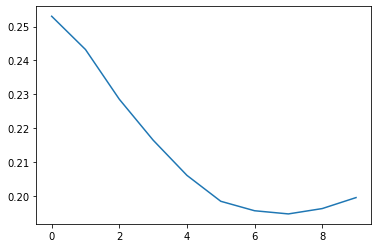

In [ ]:
# show the graph for the loss. our goal is for it to stedily decrease as the training progresses.
plt.plot(losses)
plt.show()

In [ ]:
# if the loss graph looks good, save the model
model.save('/content/drive/MyDrive/300_pistol_imgs/model_weights.pth')

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

# Take the model_weights.pth file, and use it in the image enhancement program.
